In [ ]:
import pyodbc
pyodbc.drivers()

In [1]:
from pmdarima.arima import auto_arima
import pandas as pd 
from datetime import datetime

In [1]:

pip install pydotplus graphviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=dd1de7013d74b782441a0935e0c91fa1df9b625310d2aa580013a198551f230f
  Stored in directory: c:\users\018598\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus



distutils: d:Lib\site-packages
sysconfig: d:\Lib\site-packages
distutils: d:Lib\site-packages
sysconfig: d:\Lib\site-packages
distutils: d:Include\UNKNOWN
sysconfig: d:\Include\UNKNOWN
distutils: d:Scripts
sysconfig: d:\Scripts
user = False
home = None
root = None
prefix = None
  distutils: d:Include\pydotplus
  sysconfig: d:\Include\pydotplus


<AxesSubplot:xlabel='DT'>

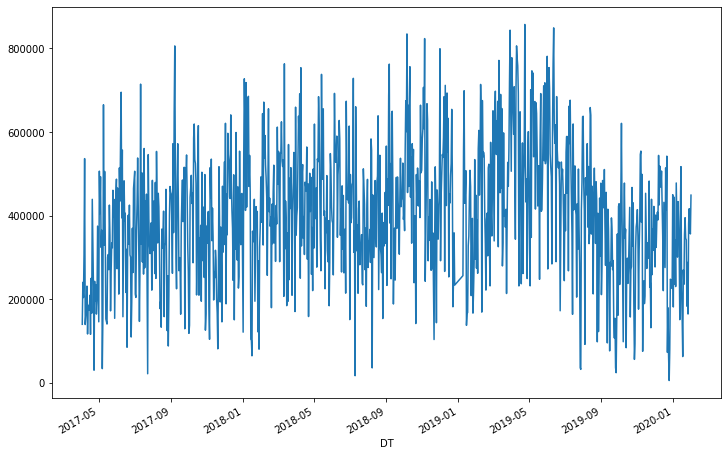

In [3]:
data['TXN'].plot(figsize=(12,8))

In [ ]:
cursor.execute("select top 10 * from DATAANALYTICS..S018598_new").fetchall()

In [1]:
import pyodbc

driver= 'SQL Server'
server= 'chdataanalytics'
db= 'dataanalytics'
user= 'sa'
password= 'analytics@123'

conn = pyodbc.connect("driver={%s};server=%s;database=%s;uid=%s;pwd=%s" % ( driver, server, db, user, password ) 
)
cursor = conn.cursor()
#cursor.execute("select top 10 * from Datamart..kvb_tn_ps_2019").fetchall()

In [6]:
import pandas as pd 
from datetime import datetime
d = pd.read_sql("select * from DATAANALYTICS..S018598_new", conn)

In [ ]:
d.head()

In [9]:
d.columns = [c.strip() for c in d.columns]
d.columns = d.columns.str.replace(' ', '_')
#d[d['Txn_date'] == '30/04/19']

In [10]:
leading_removed = [s.lstrip("0") for s in d['Txn_Amount']]

In [11]:
leading = [(datetime.strptime(s, "%d/%m/%y")) for s in d['Txn_date']]

In [22]:
lis = pd.to_numeric(leading_removed)

In [27]:
data = {'Date':leading,'Curre': lis}
df = pd.DataFrame(data)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    330 non-null    datetime64[ns]
 1   Curre   330 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


In [28]:
df1 = df.sort_values(by="Date", key=pd.to_datetime)

In [39]:
df2 = df1.reset_index(drop=True)

In [40]:
df2

,Date,Curre,Sales First Difference
0,2019-04-16,750,600.0
1,2019-04-16,2250,-306750.0
2,2019-04-16,10000,-195100.0
3,2019-04-16,375,-1875.0
4,2019-04-23,750,0.0
...,...,...,...
5467,2019-05-31,400000,-3775700.0
5468,2019-05-31,4175700,3975700.0
5469,2019-05-31,200000,-50000.0
5470,2019-05-31,50000,-478000.0


In [1]:
import pandas as pd
df1 = pd.read_excel('atm_t3.xlsx', 'Sheet1')

In [9]:
df1 = pd.read_excel('Atm_7.xlsx', 'Sheet1')

In [18]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [20]:
adfuller_test(df1['TXN'])

ADF Test Statistic : -2.5065786922743043
weak evidence against null hypothesis,indicating it is non-stationary 
p-value : 0.11388185234810388
weak evidence against null hypothesis,indicating it is non-stationary 
#Lags Used : 26
weak evidence against null hypothesis,indicating it is non-stationary 
Number of Observations : 1960
weak evidence against null hypothesis,indicating it is non-stationary 


In [2]:
data = pd.read_excel('Atm_7.xlsx', 'Sheet1')

In [3]:
data.TXN = data.TXN.astype(int)

In [4]:
pr = pd.DataFrame(data['TXN'][300:1500])

In [5]:
from pmdarima.arima import auto_arima

In [ ]:
arima = auto_arima(pr, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=0, start_Q=0, max_P=5, max_D=5, max_Q=5, m=365, seasonal=True, trace=True,random_state=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[365] intercept   : AIC=32387.796, Time=0.40 sec
 ARIMA(1,1,0)(1,0,0)[365] intercept   : AIC=32088.016, Time=190.76 sec


MemoryError: Unable to allocate 1.21 GiB for an array with shape (368, 368, 1201) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1015, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 1.21 GiB for an array with shape (368, 368, 1201) and data type float64


In [15]:
arima.summary()

NameError: name 'arima' is not defined

In [ ]:
pre = pd.DataFrame(arima.predict(n_periods), index)
pre.columns = ['pred']
pre

In [ ]:
df.time_diff.quantile([0.25,0.5,0.75])

In [7]:
data = pd.read_excel('Atm_7.xlsx', 'Sheet1')
mask = (data['DT'] > '2017-04-01') & (data['DT'] <= '2020-01-31')
data = data.loc[mask]

data.set_index(['DT'],inplace=True)

In [8]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data['TXN'])

(0.01, False)

In [21]:
df1['Sales First Difference'] = df1['TXN'] - df1['TXN'].shift(1)
df1['Seasonal First Difference']=df1['TXN']-df1['TXN'].shift(12)
df1.head()

,DT,DAY_WEEK,DAY,MONTH,YEAR,TXN,MOVING_AVERAGE,HOLIDAY,Sales First Difference,Seasonal First Difference
0,2016-04-01,FRIDAY,1,4,2016,324500,324500.000000,W,NaN,NaN
1,2016-04-02,SATURDAY,2,4,2016,166300,245400.000000,NH,-158200.0,NaN
2,2016-04-03,SUNDAY,3,4,2016,222400,237733.333333,W,56100.0,NaN
3,2016-04-04,MONDAY,4,4,2016,519000,308050.000000,W,296600.0,NaN
4,2016-04-05,TUESDAY,5,4,2016,424200,331280.000000,W,-94800.0,NaN


D:\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


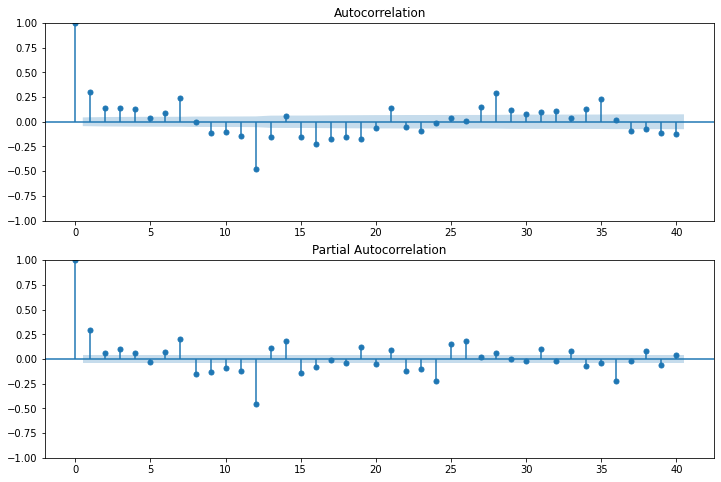

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

<AxesSubplot:>

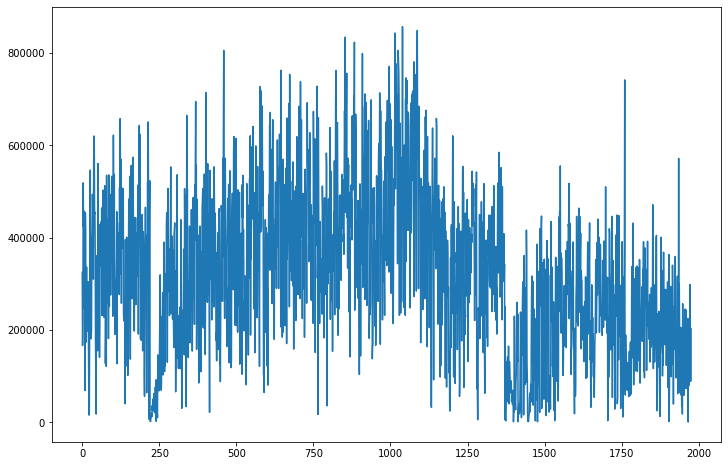

In [14]:
df1['TXN'].plot(figsize=(12,8))

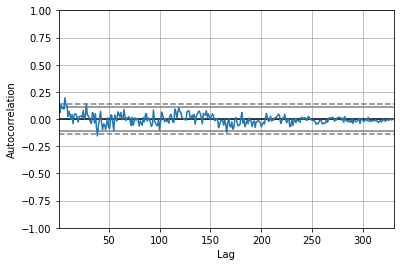

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Curre'])
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1['TXN'], order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TXN   No. Observations:                 1976
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -26090.024
Date:                Thu, 16 Dec 2021   AIC                          52188.049
Time:                        12:13:22   BIC                          52210.402
Sample:                             0   HQIC                         52196.261
                               - 1976                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1900      0.026      7.414      0.000       0.140       0.240
ar.L2          0.1182      0.027      4.449      0.000       0.066       0.170
ma.L1         -0.9429      0.011    -87.482      0.000      -0.964      -0.922
sigma2      1.948e+10   1.71e-14   1.14e+24      0.000    1.95e+10    1.95e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.98   Prob(JB):                         0.71
Heteroskedasticity (H):               0.62   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+39. Standard errors may be unstable.
"""

<AxesSubplot:>

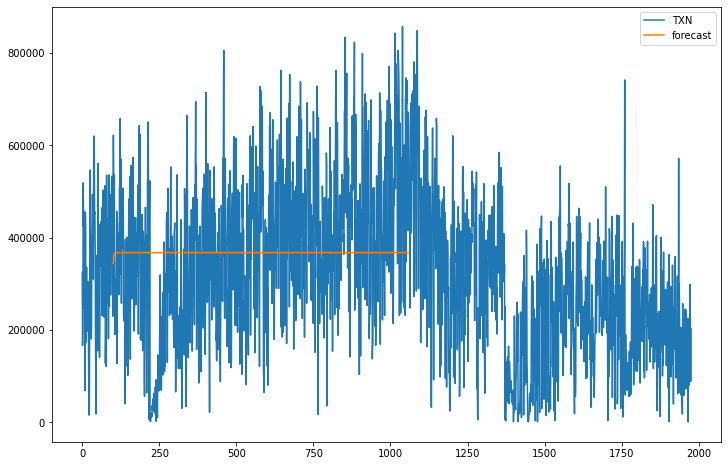

In [38]:
df1['forecast']=model_fit.predict(start=100,end=1060,dynamic=True)
df1[['TXN','forecast']].plot(figsize=(12,8))

In [23]:
#model = ARIMA(df1['Curre'], order=(2, 1, 0))  
#results_AR = model.fit(disp=-1)  
plt.plot(df1['Curre'])
#plt.plot(model_fit.fittedvalues, color='red', figsize=(12,8))
model_fit.fittedvalues.plot(figsize=(12,8))
#plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-ts_log_diff)**2))

KeyError: 'Curre'

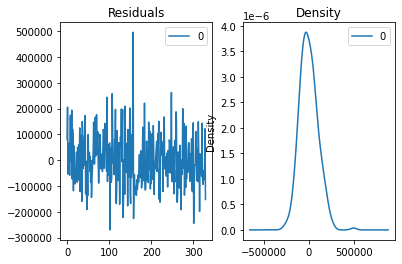

In [36]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [30]:
df1['forecast']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
325    285788.159785
326    285788.159785
327    285788.159785
328    285788.159785
329    285788.159785
Name: forecast, Length: 330, dtype: float64

In [23]:
df1.tail()

,Date,Curre,forecast
325,2021-10-27,139500,NaN
326,2021-10-28,120500,NaN
327,2021-10-29,150500,NaN
328,2021-10-30,316500,NaN
329,2021-10-31,62000,NaN


D:\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


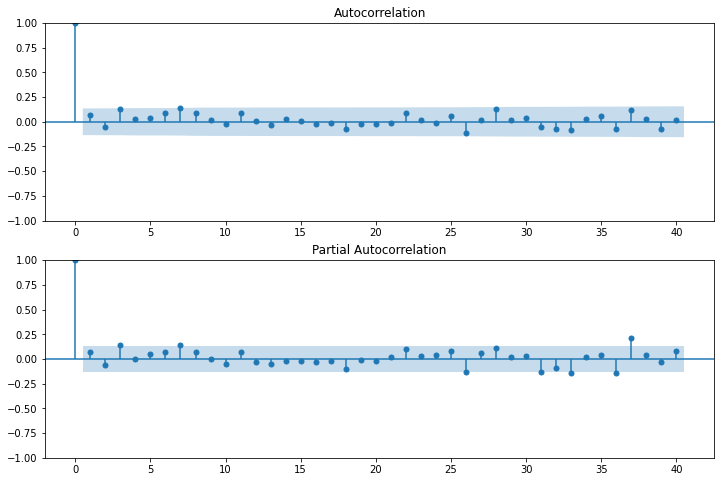

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Sales First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Sales First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [48]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['TXN'],order=(0, 1, 1),seasonal_order=(1,1,1,365))
results=model.fit()
df1['forecast']=results.predict(start=1500,end=1800,dynamic=True)
df1[['TXN','forecast']].plot(figsize=(12,8))

MemoryError: Unable to allocate 7.91 GiB for an array with shape (733, 733, 1977) and data type float64

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Sales'],order=(1,1,1))

In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

In [ ]:
ind = pd.date_range('01 / 01 / 2000', periods = 5, freq ='12H')

In [ ]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

In [ ]:
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
date_string = d['Txn_date'][1]

print("date_string =", date_string)
print("type of date_string =", type(date_string))

date_object = datetime.strptime(date_string, "%d/%m/%y")

print("date_object =", date_object)
print("type of date_object =", type(date_object))

In [ ]:
date_object = datetime.strptime(d['Txn_date'][1], "%d/%m/%y")

In [ ]:
print(date_object)

In [ ]:
t = pd.DataFrame(listvals, columns =["PinC", "Branch"])

In [ ]:
t.to_excel("TnMap3.xlsx", index = False)